# Home Assignment No. 1
## v1.0
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and centers each of its columns
by the mean within that column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [2]:
def center(arr):
    """Center each column of a matrix by the mean value in that column.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to center.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution (do not delete this comment)
    out = np.zeros((n_rows, n_cols))
    mean_cols = np.mean(arr, axis=0)
    for col_i in range(n_cols):
        out[:, col_i] = arr[:, col_i] - mean_cols[col_i]
    
    ### END Solution (do not delete this comment)

    return out

## Task 2. Numpy Problem 2 (1 point)

Plot the **Hypotrochoid** given by the following equation:
$$\begin{cases}
x(t)=(R - r) \cdot \cos(t) + d \cdot \cos\bigg(\frac{R - r}{r}\cdot t\bigg)\\
y(t)=(R - r) \cdot \sin(t) - d \cdot \sin\bigg(\frac{R - r}{r}\cdot t\bigg)
\end{cases}, 0\leq t\leq 2\pi\cdot \frac{LCM(r, R)}{R};$$
(LCM - Least Common Multiple)
with all possible values of $(R,r,d)$ if $R\in\{4,8\}$, $r\in\{1,2\}$, $d\in\{2,4\}$.

Make sure that each plot has a different color.

To compute LCM you can use `math.gcd` and the relationship between LCM and GCD.

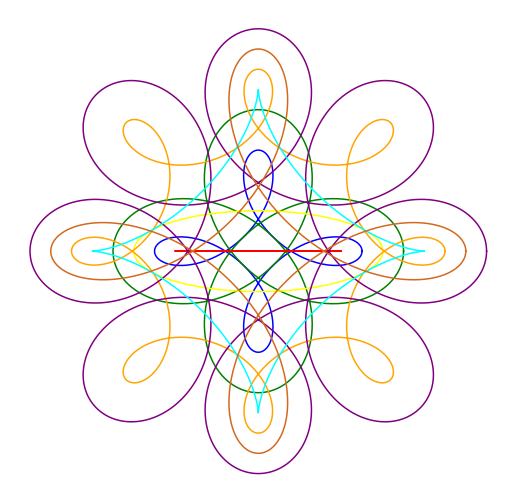

In [3]:
### BEGIN Solution (do not delete this comment)
import math as m
import warnings
warnings.filterwarnings("ignore")

def plot_hypotrochoid(R, r, d, t, ax, color):
    x = (R - r) * np.cos(t) + d * np.cos((R - r) * t / r)
    y = (R - r) * np.sin(t) - d * np.sin((R - r) * t / r)
    ax.plot(x, y, color = color)

def plot_complicated_figure(range_R, range_r, range_d, colormap):
    t_min = 0
    i = 0
    fig, ax = plt.subplots(1, 1, figsize = (9, 9))
    for R in range_R:
        for r in range_r:
            t_max = 2 * np.pi * (r / m.gcd(r, R))
            #t_max = 2 * np.pi * (np.lcm(r, R) / R)
            t = np.linspace(t_min, t_max, 1000)
            for d in range_d:
                plot_hypotrochoid(R, r, d, t, ax, color = colormap[i])
                i += 1
    ax.axis('off')
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
    fig.show()

colorm = {0: 'blue', 1 : 'green', 2 : 'red', 3 : 'yellow', 4 : 'orange', \
          5 : 'purple', 6: 'cyan', 7 : 'chocolate'}
range_R = np.array([4, 8])
range_r = np.array([1, 2])
range_d = np.array([2, 4])
plot_complicated_figure(range_R, range_r, range_d, colorm)
### END Solution (do not delete this comment)

## Task 3. Matplotlib (1 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{25}, \tfrac12, 1, 1.5, 2, 7, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

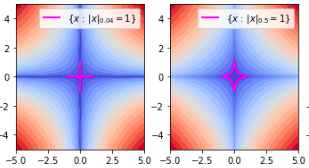

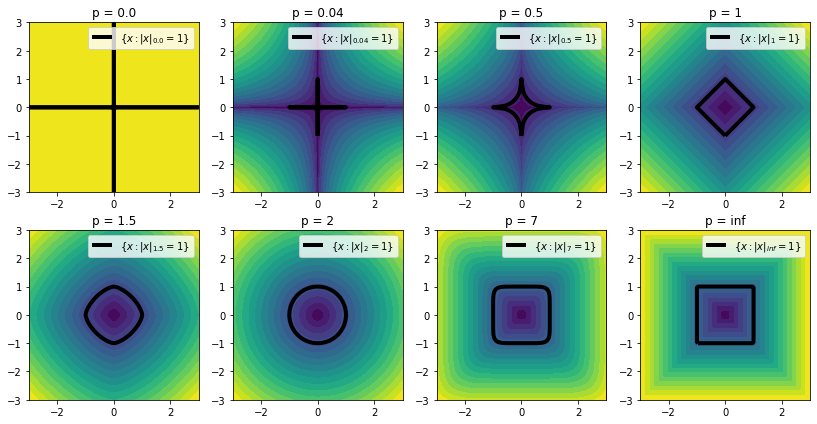

In [4]:
p_values = [0., 0.04, 0.5, 1, 1.5, 2, 7, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(14, 7))

for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution (do not delete this comment)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    p_norm = np.linalg.norm([xx, yy], p, axis=0)
    contf = ax.contourf(xx, yy, p_norm, levels = np.linspace(p_norm.min(), p_norm.max(), 20), cmap='viridis')
    ax.imshow(np.rot90(p_norm), cmap='coolwarm', extent=[xx.min(), xx.max(), yy.min(), yy.max()])
    cont = ax.contour(xx, yy, p_norm, levels=[1], colors='black', linewidths = 4)
    #ax.clabel(cont, inline=1, fontsize=7)
    ax.legend([cont.collections[0]],['{{$x:|x|_{0}=1$}}'.format({p})])
    ax.set_title('p = {0}'.format(str(p)))
    ### END Solution (do not delete this comment)
    
plt.show()

## Task 4. Decision Rules and Feature Engineering (1+1 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to an artificial $2$-dimensional dataset inspired by the dataset that can be created using the built-in `sklearn.datasets` method called `make_moons`. The main difference is a sun added outside the moons. In the cell below we generate the dataset.

In [5]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    np.random.seed(0xBEEFBAD)
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons
    
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)
    
    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)
    
    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

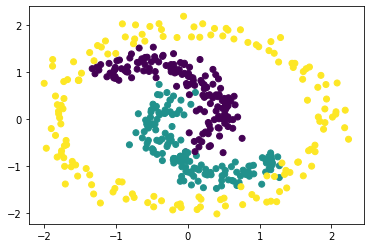

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Subproblem 4.1. Decision Rule Plotting (1 point)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with a small number of trees ($\leq 25$) of small depth ($\leq 4$);
* Logistic Regression;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with a small number of neighbors (e.g. $3$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains the name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has an awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

![title](data/example.png)

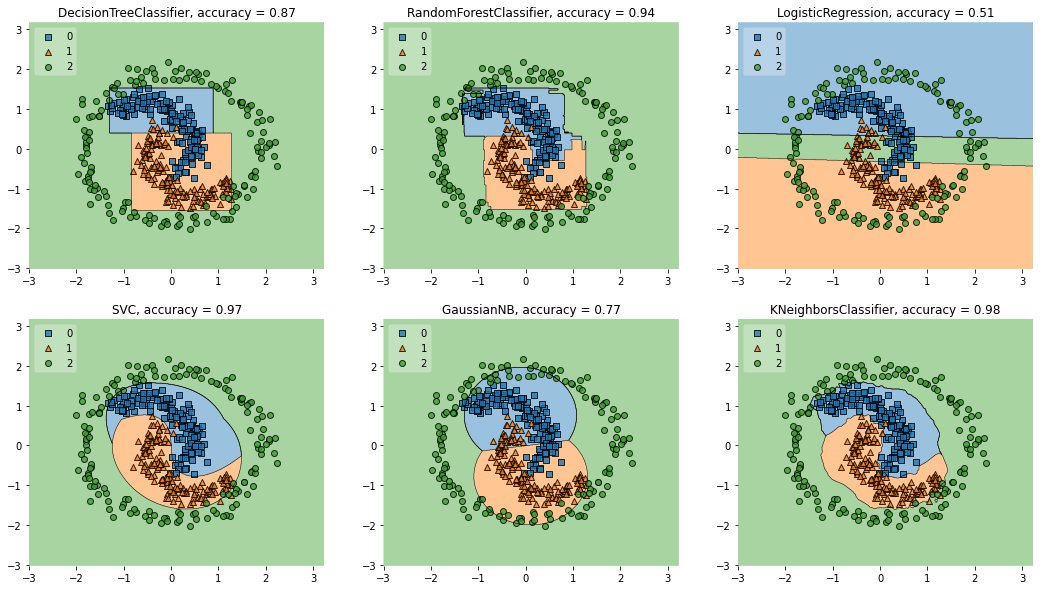

In [7]:
### BEGIN Solution (do not delete this comment)
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.gridspec as gridspec
import itertools

rand_state = 0
clf1 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, criterion = 'entropy', random_state=rand_state) #criterion = 'entropy'
clf2 = RandomForestClassifier(max_depth=4, n_estimators=22, random_state=rand_state, n_jobs = -1)
clf3 = LogisticRegression(penalty = 'l2', C = 5.0, max_iter = 1000, n_jobs=-1, random_state=rand_state)
clf4 = SVC(kernel='rbf', C = 3) 
clf5 = GaussianNB()
clf6 = KNeighborsClassifier(n_neighbors = 3, n_jobs=-1)

labels = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression', \
          'SVC', 'GaussianNB', 'KNeighborsClassifier']

figure = plt.figure(figsize = (18,10))

for clf, label, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6], labels,
                           itertools.product([0, 1], [0, 1, 2])):
    clf.fit(X, y)
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y_pred, y)
    ax = figure.add_subplot(gridspec.GridSpec(2, 3)[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label + ', accuracy = %.2f' % accuracy)
    
plt.show()

### END Solution (do not delete this comment)

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engineering (1 point)
In previous task 4.1 several classifiers obviously failed fitting to data. This happened because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences about why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted features and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

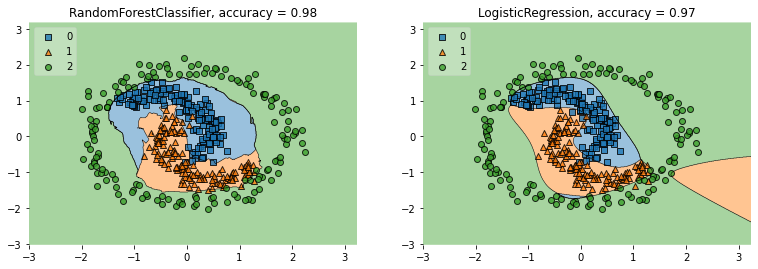

In [8]:
### BEGIN Solution (do not delete this comment)
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import make_pipeline
#from sklearn.metrics import classification_report

labels = ['RandomForestClassifier', 'LogisticRegression']
figure = plt.figure(figsize = (20,9))

poly = PolynomialFeatures(4)
proj_1 = GaussianRandomProjection(n_components=8, random_state=rand_state)
proj_2 = GaussianRandomProjection(n_components=5, random_state=rand_state)
#clf_1 = DecisionTreeClassifier(max_depth=4, min_samples_split=30, criterion = 'gini', random_state=rand_state)
clf_1 = RandomForestClassifier(max_depth=4, n_estimators=25, criterion = 'gini', random_state=rand_state, n_jobs = -1)
clf_2 = LogisticRegression(penalty = 'l2', tol=1e-5, C = 10, max_iter = 1000, n_jobs=-1)

pipe_1 = make_pipeline(poly, proj_1, clf_1)
pipe_2 = make_pipeline(poly, proj_2, clf_2)

for pipe, label, grd in zip([pipe_1, pipe_2], labels,
                           itertools.product([0], [0, 1])):
    pipe.fit(X, y)
    y_pred = pipe.predict(X)
    accuracy = accuracy_score(y_pred, y)
    ax = figure.add_subplot(gridspec.GridSpec(2, 3)[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=pipe, legend=2)
    plt.title(label + ', accuracy = %.2f' % accuracy)
    
plt.show()
### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

I chose 
- RandomForest since it's an ensembling method so sounds more promising than simple Desicion Tree for complex data structure
- and Logistic Regression since it's quite interpretative and common method but showed low performance on linear features so I decided to check how much better it performs on non-linear features

For both classifiers, I first transformed data with PolynomialFeatures and then GaussianRandomProjection. Hyperparameters were fitted by handmade grid search in order to observe the dynamics more. The results turned out to be similar for both classifiers.

Regarding creating polynomial features I can interpret the results in the following way: even features with max degree 2 are already enough to significantly increase accuracy (especially for LogisticRegression), but with degree of 4 which is more sharp the accuracy achieves the maximum (w.r.t. this parameter) and only decreases with higher degrees.

Varying the dimensionality of the target projection space for GaussianRandomProjection we can make similar conclusions - smaller dimensionality cannot catch the structure of the data, however, larger dimensionality doesn't increase accuracy. 

The accuracy we obtained on both classifiers in significantly better than in the previous task although in the structure of decision regions one can suspect some overfitting. I can suggest that maybe it's not the best idea to measure accuracy on the same set on which we trained models. 

## Task 5. Model Selection (1+1 points)

You are to test Random Forests and Support Vector Machines on a trivial [Tic Tac Toe Endgame Dataset](https://datahub.io/machine-learning/tic-tac-toe-endgame). Let's load it.

In [9]:
data = pd.read_csv('data/tic-tac-toe.csv')
X, y = data.drop('class', axis=1), data['class'].astype(int)
data.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
858,o,b,x,o,x,o,o,x,x,False
375,o,o,x,x,x,b,x,b,o,True
196,x,o,b,x,o,x,x,b,o,True


The dataset consists of several possible endgame positions of the Tic-Tac-Toe game. The target variable is the victory of `x` player over `o` player (victory or defeat/draw). Since the features are categorical, we simply transform them to real-valued $-1$ for `o`, $1$ for `x` and $0$ for empty cell `b`.

In [10]:
X = X.applymap(lambda v: 1 if v == 'x' else -1 if v == 'o' else 0)
X.sample(4).sort_index()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
183,1,-1,-1,0,1,0,-1,1,1
371,-1,-1,1,1,1,-1,1,1,-1
763,-1,1,1,-1,0,1,-1,0,0
931,0,0,1,-1,-1,-1,1,0,1


We are going to test how machine learning algorithms can classify the final game positions into the ones when `x` player won and all others. Everybody knows that for this problem there is a simple decision rule: `x` wins if there are three `x`'s in a row/column/diagonal. But can our cool machine learning tools catch this trivial dependence? In this problem, the class balance is around $2:1$ so we still use the accuracy metric.

Intuitively, this rule is logical, i.e. one may expect a decision-tree-based algorithm to be the most appropriate for this case. But is that true? In the code below we compare huge Random forest with simple Logistic Regression and SVM with default parameters.

In [11]:
np.random.seed(0xBADBEEF)
test_idx = list(np.random.choice(range(len(X)), 650, replace=False))
train_idx = [i for i in range(len(X)) if i not in test_idx]

Note that we will use only $\frac{1}{3}$ of data to train and $\frac{2}{3}$ to test the model.

In [12]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)
svm = SVC(gamma='auto')
lr = LogisticRegression(solver='lbfgs')
clfs = (rf, svm, lr)

for clf in clfs:
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    score = accuracy_score(y.iloc[test_idx], clf.predict(X.iloc[test_idx]))
    name = clf.__class__.__name__
    print(f'{name} scored {round(score, 3)}')

RandomForestClassifier scored 0.932
SVC scored 0.94
LogisticRegression scored 0.972


We see all the models provide reasonable quality. Yet we are not satisfied!

### Subproblem 5.1. Model selection for SVM (1 of 2 points)
Perform **Grid Search** on a train set for optimal hyperparameter for SVM model in order to achieve a 5-fold validation accuracy score on the data not lower than $0.98$. You can code the Grid Search Manually, but we highly encourage you to use the built-in `GridSearchCV` method. **Report** the 5-fold validation accuracy score, test accuracy score using the model refitted with best hyperparameters and also print best hyperparameters. **Explain** the results: does your model overfit?

In [13]:
### BEGIN Solution (do not delete this comment)
from sklearn.model_selection import GridSearchCV
svm = SVC()
parameters = {'kernel':['linear', 'rbf', 'sigmoid'], 'C':[0.01, 0.1, 0.5, 1, 2, 3, 5, 10, 30, 50, 200],
             'tol' : [1e-10, 1e-9, 1e-6, 1e-3], 'gamma' : ['scale', 'auto']}
svm_gs = GridSearchCV(svm, parameters, cv = 5, n_jobs = -1)
svm_gs.fit(X.iloc[train_idx], y.iloc[train_idx])
print('best parameters:', svm_gs.best_params_)
#print('accuracy on the training set:', clf.best_score_)
print(f'SVM scored on CV {round(svm_gs.best_score_, 3)}')

svm = svm_gs.best_estimator_ #SVC(svm_gs.best_params_)
svm.fit(X.iloc[train_idx], y.iloc[train_idx])
test_score = accuracy_score(y.iloc[test_idx], clf.predict(X.iloc[test_idx]))
print(f'SVM scored on Test {round(test_score, 3)}')
### END Solution (do not delete this comment)

best parameters: {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear', 'tol': 1e-10}
SVM scored on CV 0.98
SVM scored on Test 0.972


**Your text answer (do not delete this comment)**:

I think this is too small difference in accuracy to consider it overfitting. A model uses only train data and doesn't use test data at all therefore small differences that are quite possible in the nature of train and test sets can easily affect the test score, still showing almost equal quality.

Besides, we report here not train score, but cross-validation score which is less prone to overfitting.

During training - from underfitting to overfitting - we can look at both values of train and test scores. As long as they both decrease we should continue learning and test score may be less than train score.

### Subproblem 5.2. Feature engineering for Random Forest  (1 of 2 points)
Perform **feature engineering** for Random Forest with given hyperparameters in order to achieve 5-fold mean validation score not lower than $0.96$. **Write** 2-3 sentences to explicitly explain your motivation for provided feature choice. Fit the model on the whole train set and **provide** the test score. 

In [14]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)

### BEGIN Solution (do not delete this comment)

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.feature_selection import RFE

rand_state = 0
X_new = X.copy()

X_new['sum'] = X_new[:].apply(sum, axis=1)
poly = PolynomialFeatures(3)
X_new = poly.fit_transform(X_new)

#X_new = X_new.applymap(lambda v: 1 if v == 1 else 0 if v == -1 else 0)
#X_new['horisontal'] = (X_new['TL'] & X_new['TM'] & X_new['TR']) | \
#                        (X_new['ML'] & X_new['MM'] & X_new['MR']) | \
#                        (X_new['BL'] & X_new['BM'] & X_new['BR'])
#X_new['vertical'] = (X_new['TL'] & X_new['ML'] & X_new['BL']) | \
#                        (X_new['TM'] & X_new['MM'] & X_new['BM']) | \
#                       (X_new['TR'] & X_new['MR'] & X_new['BR'])
#X_new['diagonal'] = (X_new['TL'] & X_new['MM'] & X_new['BR']) | \
#                        (X_new['TR'] & X_new['MM'] & X_new['BL'])

selector = RFE(rf, 9, step=1)
X_new = selector.fit_transform(X_new, y)
#print(selector.ranking_)

X_train, y_train = X_new[train_idx], y[train_idx]
X_test, y_test = X_new[test_idx], y[test_idx]

cv = cross_validate(rf, X_train, y_train, cv=5, return_estimator=True)
cv_score = np.mean(cv['test_score'])
print(f'RF scored on CV {round(cv_score, 3)} for extra features')
#rf.fit(X_train, y_train)
test_score = accuracy_score(y_test, cv['estimator'][-1].predict(X_test))
print(f'RF scored on Test {round(test_score, 3)}')

### END Solution (do not delete this comment)

RF scored on CV 0.98 for extra features
RF scored on Test 0.985


**Your text answer (do not delete this comment)**:

#### What did I do.
Though simple feature engineering may produce accuracy of 100% here (see second option below) I decided to make it a bit more complicated in case of if we woudn't have such simple and well-defined rules of the game and would have some stochastisity. I created polynomial features of degree not higher than 3 and one additional feature - the sum of all the features in a row, which can be interpreted as difference in the number of 'x' and 'o'. Therefore, this features can be useful for the task. Then I applied RFE (Feature ranking with recursive feature elimination) in order to define 9 more valuable features. I left them for further learning and got quite a good score. If one would look at the objects misclassified he would see that these are objects with 'draw' result.

Second possible option - explicitly create features that are responsible for the right answer: since we know what produces right answer (the combination of 3 'x' either on a row or on a column or on a diagonal) then we can check for the presense of such combination. This feature engineering can only be achieved because we know the exact rules of this game. Such distinctness allows to achieve 100% accuracy on the train and test sets if one uses these features.

## Task 6. Bagging Ensembles of Regressors (1+1 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). Your goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [15]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
350,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,14.0,33.70
467,250.0,0.0,95.7,191.8,5.3,948.9,857.2,100.0,41.16
629,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,7.0,11.17


Please note that both in Task 4 and Task 5 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data). In task 5 the output score was the **validation score**, i.e. the result of validating the model on the train data.

In this problem, we do a step further and split the whole data into the train part (on which we train & validate) and test part (where we compute the final **test** score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstrapped forest with a simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in the random forest the split minimizes impurity).

### Subproblem 6.1. Hyperparameters tuning (1 point)

* For both Forests perform the Grid Search (on the whole train data using 5-fold cross-validation scheme) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal hyperparameters output the 5-fold mean train score, 5-fold mean validation score and the test score (to obtain test score use the model with best hyperparameters refitted on the whole train set).

In [16]:
### BEGIN Solution (do not delete this comment)
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

rand_state=0
rfr = RandomForestRegressor(n_jobs=-1, random_state = rand_state)
etr = ExtraTreesRegressor(n_jobs=-1, random_state = rand_state)

params_rf = {'n_estimators' : np.arange(20, 360, 80), 'max_depth' : [8, 10, 12],
            #'min_impurity_split' : [None, 1e-08, 1e-05],
            'max_features' : ['auto', 5, 7], 'random_state' : [rand_state]}
params_et = {'n_estimators' : np.arange(20, 280, 65), 'max_depth' : [8, 10, 12],
            #'min_impurity_split' : [None, 1e-08, 1e-05],
            'max_features' : ['auto', 5, 7], 'random_state' : [rand_state]}

rfr_gs = GridSearchCV(rfr, params_rf, return_train_score=True, cv = 5, n_jobs = -1)
rfr_gs.fit(X_train, y_train)
rfr_params = rfr_gs.best_params_
etr_gs = GridSearchCV(etr, params_et, return_train_score=True, cv = 5, n_jobs = -1)
etr_gs.fit(X_train, y_train)
etr_params = etr_gs.best_params_

print('best parameters for RandomForest:', rfr_params)
print('best parameters for ExtraTrees:', etr_params)
print('---------------------------------')

rfr = rfr_gs.best_estimator_
etr = etr_gs.best_estimator_ 

cv_rf = cross_validate(rfr, X_train, y_train, cv=5, return_estimator=True, scoring = 'neg_mean_squared_error',\
                       n_jobs = -1, return_train_score=True)
cv_score_rf = -np.mean(cv_rf['test_score'])
train_score_rf = -np.mean(cv_rf['train_score'])
#train_score_rf = np.abs(rfr_gs.cv_results_['mean_train_score'][rfr_gs.best_index_])
#cv_score_rf = np.abs(rfr_gs.cv_results_['mean_test_score'][rfr_gs.best_index_])
test_score_rf = mean_squared_error(y_test, rfr.predict(X_test))
#train_score_rf = mean_squared_error(y_train, rfr.predict(X_train))

cv_et = cross_validate(etr, X_train, y_train, cv=5, return_estimator=True, scoring = 'neg_mean_squared_error', \
                        n_jobs = -1, return_train_score=True,)
cv_score_et = -np.mean(cv_et['test_score'])
train_score_et = -np.mean(cv_et['train_score'])
test_score_et =  mean_squared_error(y_test, etr.predict(X_test))

print('Ensemble Classifier\t', 'Train\t', 'Valid\t', 'Test\t')
#print(f'ExtraTreesRegressor       {round(train_score_rf, 3)}     {round(cv_score_rf, 3)}     {round(test_score_rf, 3)}')
print('ExtraTreesRegressor\t', round(train_score_rf, 3), '\t', round(cv_score_rf, 3), '\t', round(test_score_rf, 3))
#print(f'RandomForestRegressor       {round(train_score_et, 3)}     {round(cv_score_et, 3)}     {round(test_score_et, 3)}')
print('RandomForestRegressor\t', round(train_score_et, 3), '\t', round(cv_score_et, 3), '\t', round(test_score_et, 3))
### END Solution (do not delete this comment)

best parameters for RandomForest: {'max_depth': 12, 'max_features': 5, 'n_estimators': 340, 'random_state': 0}
best parameters for ExtraTrees: {'max_depth': 12, 'max_features': 7, 'n_estimators': 150, 'random_state': 0}
---------------------------------
Ensemble Classifier	 Train	 Valid	 Test	
ExtraTreesRegressor	 5.04 	 27.108 	 23.996
RandomForestRegressor	 2.084 	 25.256 	 23.193


### Subproblem 6.2. Results explanation (1 point) 

* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

**Your text answer (do not delete this comment)**:

1. The results differ so much because of overfitting. The model fitted for the train data too well, that' why we have a very small error on it. However, on validation and test data the error is similar in the value because in both cases we test sets of the data unknown before. It is especially noticeble for large values of max_depth. But if we take, for example, max_depth value lower (e.g. 10), we would get even higher score on the train set which would mean less overfitting.
2. Random Forest performs better because Extra Trees is more predisposed to overfitting, especially with large numbre of trees. These trees become more correlated because of using all the features, not subsets, and therefore, tend to fit to data too much.

## Task 7. Multiclass Classification Strategies (1 point)
In this task, you deal with a multiclass classification problem for [Glass Classification Data](https://www.kaggle.com/uciml/glass). Let's load the dataset.

In [17]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
79,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.0,0.0,2
87,1.51645,13.40,3.49,1.52,72.65,0.67,8.08,0.0,0.1,2
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6


The features of each glass object correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to these algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross-validation on the data. The output in the **table** form must include 5-fold mean validation score and the computation time. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own.

**HINT**: use ```time.perf_counter()``` to measure time.

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross-validation and why? Explain
* For which algorithms the usage of the OneVSRest/OneVSOne approach provides significantly better performance without a significant increase in computation time?

In [18]:
### BEGIN Solution (do not delete this comment)
from time import perf_counter 
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import balanced_accuracy_score

#print(np.unique(y, return_counts=True))

rand_state = 0
clfs = [
    LogisticRegression(n_jobs=-1, random_state=rand_state),
    RandomForestClassifier(max_depth=3, n_estimators=100, random_state=rand_state, n_jobs = -1),
    KNeighborsClassifier(n_neighbors = 5, n_jobs=-1),
    DecisionTreeClassifier(max_depth=7, random_state=rand_state)] #criterion = 'entropy', 'gini'

score = np.zeros((3, 4))
time = np.zeros((3, 4))

for i, clf in zip(np.arange(4), clfs):
    onevsrest = OneVsRestClassifier(clf, n_jobs = -1)
    onevsone = OneVsOneClassifier(clf, n_jobs = -1)
    approach = [None, onevsrest, onevsone]
    for j, appr in zip(np.arange(3), approach):
        if (appr):
            t_start = perf_counter()
            cv = cross_validate(appr, X, y, cv=5, scoring = 'balanced_accuracy')
            t_end = perf_counter()
            score_cv = np.mean(cv['test_score'])
            score[j][i] = score_cv
        else:
            t_start = perf_counter()
            cv = cross_validate(clf, X, y, cv=5, scoring = 'balanced_accuracy')
            t_end = perf_counter()
            score_cv = np.mean(cv['test_score'])
            score[j][i] = score_cv
        
        time[j][i] = t_end - t_start

models = ["Logistic", "Random Forest", "K Nearest Neighbors", "Decision Tree"]
appr = ["Multiclass", "OneVsRest", "OneVsOne"]
CVS = pd.DataFrame(score, columns = models, index = appr)
TD = pd.DataFrame(time, columns = models, index = appr)

print('Cross Validation Scores, metric is a Balanced Accuracy')
display(CVS)
print('Training Duration (CV = 5)')
display(TD)

### END Solution (do not delete this comment)

Cross Validation Scores, metric is a Balanced Accuracy


,Logistic,Random Forest,K Nearest Neighbors,Decision Tree
Multiclass,0.442976,0.434583,0.551071,0.530198
OneVsRest,0.385298,0.536032,0.575159,0.589921
OneVsOne,0.459147,0.600635,0.554921,0.659544


Training Duration (CV = 5)


,Logistic,Random Forest,K Nearest Neighbors,Decision Tree
Multiclass,0.382981,1.566813,0.152807,0.033342
OneVsRest,1.428824,7.979186,0.715721,0.254419
OneVsOne,2.582689,26.033932,3.167866,0.512320


**Your text answer (do not delete this comment)**:

As a metric I chose balanced_accuracy_score because if one look at the distribution of the classes in dataset ([70, 76, 17, 13,  9, 29] for classes [1, 2, 3, 5, 6, 7]), it may be considered unbalanced. Since the amount of objects of 1 or 2 class is even larger than the sum of objects of four other classes so even trivial classifier assigning label 2 to every object would have accuracy of 36% on this set which is comparable to our obtained results. So, balanced accuracy, defined as the average of recall obtained on each class, can be better choice for this problem.

As we can observe from the tables, Decision Tree performed best in both time and score. K Nearest Neighbors may take second place in terms of score-time balance but still, it's significantly slower.

Talking about performance boost of using OneVSRest/OneVSOne, one can notice that only for Decision Tree and Random Forest these approaches increased accuracy considerably but also increased computation time by 13 times (OneVsOne) and by 5-7 times (OneVsRest) for my computations. For all algorithms using OneVSRest/OneVSOne caused significant increase in time.

## Task 8. Boosting, part 1. (1+1 points)


> Boosting Machines (BM) is a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, which perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly, we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is achieved by reweighting the training samples during each algorithm's step. 

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in lectures.

For `ada_boost_distribution` please use another pseudocode, that used for `sklearn` realization:
$$
\begin{align}
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;w_{i,t+1}\gets w_{i,t}\exp(-\alpha_t y_t h_t(\mathbf{x}_i))\\
&C = \sum_{j=1}^m w_{j,t+1}\\
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;\tilde{w}_{i,t+1}\gets \tfrac{1}{C}w_{i,t+1}
\end{align}
$$

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your_accuracy} - \text{sklearn_accuracy}| \leq 0.005
\,. $$

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [20]:
### Plot the dataset

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

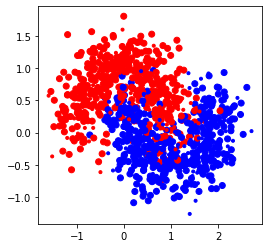

In [22]:
# Plot the training points
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright)

In [23]:
from sklearn.tree import DecisionTreeClassifier # base classifier

### Subproblem 8.1.1. AdaBoost alphas and distribution (1 point)

Now let us define functions to calculate alphas and distributions for AdaBoost algorithm

In [24]:
def ada_boost_alpha(y, y_pred_t, distribution):
    """
    Function, which calculates the weights of the linear combination of the classifiers.
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    m = y.shape[0]
    N_error = np.sum(distribution * (y * y_pred_t <= 0)) #for j in range(m)
    alpha = 0.5 * np.log((1 - N_error) / N_error)
    ### END Solution (do not delete this comment)

    return alpha

def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    Function, which calculates sample weights
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    distribution = distribution * np.exp(-alpha_t * y_pred_t * y)
    C_sum = np.sum(distribution)
    distribution /= C_sum
    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 8.1.2. Boosting implementation (1 point)

Implement your own AdaBoost algorithm. Then compare it with the `sklearn` implementation.

In [25]:
class Boosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())     
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            ### BEGIN Solution (do not delete this comment)
            
            # make a prediction
            y_pred = self.classifiers[-1].predict(X)
            # update alphas, append new alpha to self.alphas
            alpha = self.get_alpha(y, y_pred, distribution)
            self.alphas.append(alpha)
            # update distribution and normalize
            distribution = self.update_distribution(y, y_pred, distribution, alpha)
            
            ### END Solution (do not delete this comment)

    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        # get the weighted votes of the classifiers
        for i in range(self.n_estimators):
            final_predictions += self.alphas[i] * self.classifiers[i].predict(X)
        out = np.array([1 if final_predictions[j] > 0 else -1 for j in range(X.shape[0])])
        ### END Solution (do not delete this comment)
        return out

In [26]:
from sklearn.ensemble import AdaBoostClassifier

max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost1 = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost1.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [27]:
classifiers = [ada_boost1, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.875
accuracy ada_boost_sklearn: 0.875


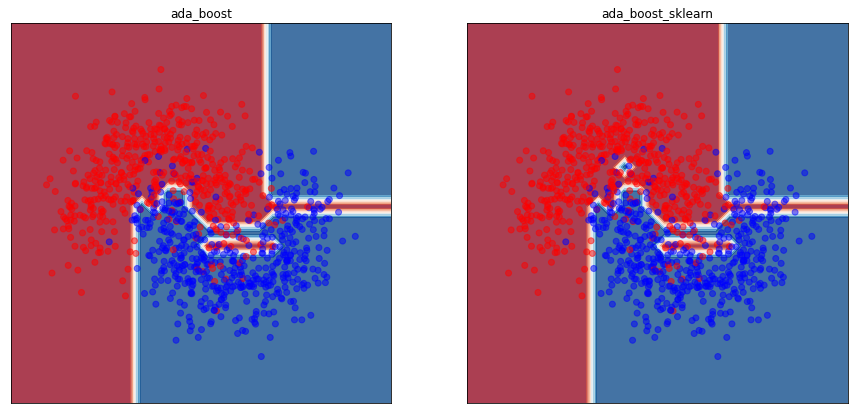

In [28]:
# test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 8. Boosting, part 2. (1+1+1 points)

For adaboost we have computed each alpha according to the formula:

$$\alpha_t = \frac{1}{2}\log{\frac{1-N_T(h_T, w_T )}{N_T(h_T,w_t)}}$$

In the next task you will be asked to recompute all of the alphas on each iteration after adding another estimator to the composition of models, i.e. when the new classifier is fitted to the weighted data samples, the new alphas should be recomputed by directly minimizing the exponential loss, for all the available estimators. Take into account that at each step of the boosting algorithm **all** alphas and, consequently, **all** sample weights should be recomputed from scratch. 

**The task**:
* Complete the `recompute_alpha` and `recompute_distribution` functions
* Complete the `.fit` method of `RecomputeBoosting` class
* Complete the `.predict` method of `RecomputeBoosting` class
* Plot the final alphas (last calculated in case of recomputed alphas)
* plot the history scores of the resulting model at each iteration (use ```predict```, ```score``` and ```construct_alpha_history``` functions defined below) for both RecomputedBoosting and AdaBoost (it can be either your own implementation from Exercise 1.1 or the one from sklearn - in this case use ```.estimator_weights_```, ```.estimators_```)
* Make a conclusion about which method is better and in which case - in order to do that you can additionally vary the parameters of training: number and depth of the estimators, the noise of the data (moons)

**HINTS:**

In order to minimize the exponential loss with respect to alpha, use the [```scipy.optimize.minimize```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function.

When defining the function to minimize (in the case of AdaBoost it should be the exponential loss), have a look at the optimization problem formulation of Ridge Regression and at the regularization parameter (Lecture 2). Add it in order to guarantee the existence of the solution.

In [29]:
from scipy.optimize import minimize

### Subproblem 8.2.1. Recomputation of AdaBoost alphas and distribution (1 point)

Now let us define functions to recompute alphas and distributions for AdaBoost algorithm

In [30]:
def recompute_alpha(y, y_pred, C):
    """
    y_pred - is a list of predictions of the existing estimators
    C - is a reguralization term    
    """
    ### BEGIN Solution (do not delete this comment)
    m = y.shape[0]
    t = len(y_pred)
    #alpha0 = np.ones(t) * np.sqrt(1 / t)
    alpha0 = np.zeros(t)
    alpha0[:t] = np.sqrt(1 / t)
    
    def loss(alpha):
        return sum(np.exp(-y * np.sum(alpha[k] * y_pred[k] for k in range(t)))) + C * np.linalg.norm(alpha)**2
    res = minimize(loss, alpha0, method='BFGS')
    alphas = res.x
    ### END Solution (do not delete this comment)

    return alphas
    

def recompute_distribution(y, y_pred, alphas):
    """
    y_pred - is a list of predictions of the existing estimators
    alphas - are the last recomputed alphas
    """
        
    ### BEGIN Solution (do not delete this comment)
    m = y.shape[0]
    y_pred = np.array(y_pred)
    t = y_pred.shape[0]
    def exp_through_t(alphas_, y_, y_pred_, t):
        return np.exp(-y_ * np.sum(alphas_[j] * y_pred_[j] for j in range(t)))
    distribution = np.array([exp_through_t(alphas, y[k], y_pred[:, k], t) for k in range(m)])
    C = np.sum(distribution)
    distribution /= C
        
    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 8.2.2. Recomputed Boosting implementation (1 point)

Implement recomputation of Boosting algorithm. Then compare it with the `sklearn` implementation.

In [31]:
class RecomputedBoosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=recompute_alpha, update_distribution=recompute_distribution, C=1.0):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        self.C = C
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        
        # notice how alpha is a matrix - we will store the history of the updates here
        self.alphas = np.zeros((self.n_estimators, self.n_estimators)) #self? -> corrected
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())        
            self.classifiers[-1].fit(X, y, sample_weight=distribution)
            
            
            ### BEGIN Solution (do not delete this comment)
            
            # create a list of predictions across all classifiers
            if (i == 0):
                predictions = [] #np.zeros((self.n_estimators, n_samples))
            predictions.append(self.classifiers[-1].predict(X))
            
            # recalculate alphas, add them to the matrix of self.alphas 
            # NOTE: here, self.alphas is a history of computed alphas at each step i
            alphas_cur = self.get_alpha(y, predictions, self.C)
            alphas_cur.resize(self.n_estimators)
            self.alphas[i] = alphas_cur
            # update distribution and normalize
            distribution = self.update_distribution(y, predictions, self.alphas[i])
            ### END Solution (do not delete this comment)
    
    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        
        # get the weighted votes of the classifiers
        # do not forget that self.alphas is the whole history of recalculated alphas!
        for i in range(self.n_estimators):
            final_predictions += self.alphas[-1][i] * self.classifiers[i].predict(X)
        out = np.array([1 if final_predictions[j] > 0 else -1 for j in range(X.shape[0])])
        ### END Solution (do not delete this comment)
        
        return out

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = RecomputedBoosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf, get_alpha=recompute_alpha, 
                     update_distribution=recompute_distribution, C=1.0)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [33]:
classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.91
accuracy ada_boost_sklearn: 0.875


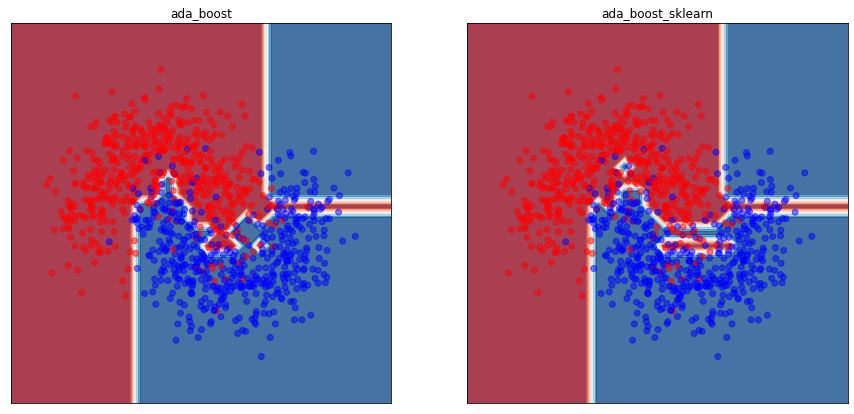

In [34]:
# test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

### Subproblem 8.2.3. Plotting the results (1 point)

- Plot the resulting alphas (last calculated in case of recomputed alphas)
- Plot the scores of the models at each iteration (each iteration - each estimator added to the ensemble) for AdaBoost and RecomputedAdaBoost

In [35]:
from sklearn.metrics import accuracy_score

def score(alphas, estimators, X, y):
    return accuracy_score(y, predict(alphas, estimators, X))

def predict(alphas, estimators, X, y=None):
    return np.sign(sum(
        b * e.predict(X) for b, e in zip(alphas, estimators)
    ))

def construct_alpha_history(init_alphas):
    """
    construct alpha history, alike recomputed alpha history, for AdaBoost algorithm
    """
    alphas = np.zeros((len(init_alphas), len(init_alphas)))
    for t, alpha in enumerate(init_alphas):
        alphas[t:, t] = alpha
    return alphas

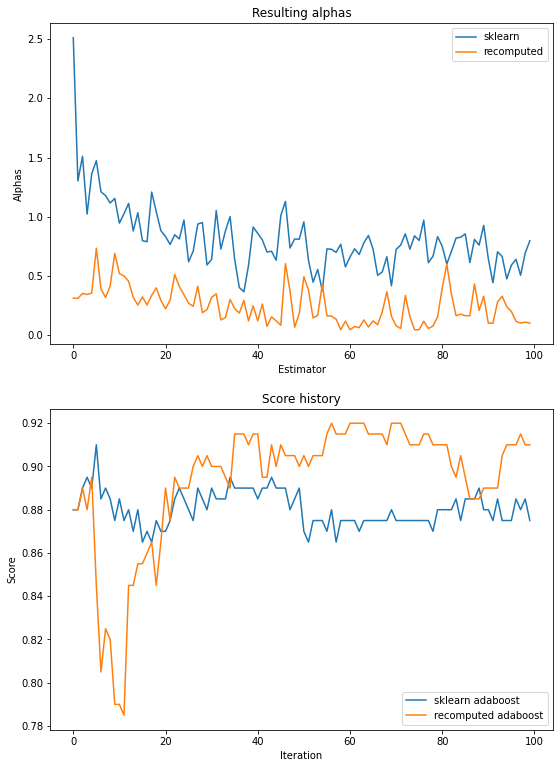

In [36]:
### BEGIN Solution (do not delete this comment)
fig, axes = plt.subplots(2, 1, figsize = (9, 13))

axes[0].plot(range(n_estimators), ada_boost_sklearn.estimator_weights_, label = 'sklearn')
axes[0].plot(range(n_estimators), ada_boost.alphas[-1], label = 'recomputed')
axes[0].legend()
axes[0].set_xlabel('Estimator')
axes[0].set_ylabel('Alphas')
axes[0].set_title('Resulting alphas')


alphas_recomp_array = construct_alpha_history(ada_boost.alphas[-1])
score_recomputed = [score(alphas_recomp_array[j], \
                          ada_boost.classifiers[:(j+1)], X_test, y_test) for j in range(n_estimators)]

alphas_array = construct_alpha_history(ada_boost_sklearn.estimator_weights_)
score_sklearn = [score(alphas_array[j], \
                      ada_boost_sklearn.estimators_[:(j+1)], X_test, y_test) for j in range(n_estimators)]
    
axes[1].plot(range(n_estimators), score_sklearn, label = 'sklearn adaboost')
axes[1].plot(range(n_estimators), score_recomputed, label = 'recomputed adaboost')
axes[1].legend()
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Score')
axes[1].set_title('Score history')

fig.show()
### END Solution (do not delete this comment)

Make a conclusion about which method is better and in which case.

**Your text answer (do not delete this comment)**:

One can easily notice that in general sklearn Adaboost realization is significantly faster (which is quite explainable if it doesn't recompute values on each iteration).

If the number of estimators isn't large, sklearn version looks better and the result seems to be more stable. But with the increase in the number of estimators our approach (with recomputing alphas and distribution on each iteration) gives better result, though works slower. Therefore, I think it can be considered as a time-quality trade-off.

## Task 9. Gradient Boosting and Feature Selection (1+1 points)

Gradient Boosting Machines (GBM) is a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are extremely powerful tools, widely used in industry, research and various machine learning competitions. 

In this task we offer to focus on one variant of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).

Make sure that you have installed the XGBoost package before starting the task. 

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data/telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]
data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

### Subproblem 9.1 (1 point)

 You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest. Afterward, compare the models' feature importances. 

* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the average precision score on the test set
* plot ROC-curve
* repeat the previous steps for Random Forest classifier

**HINT**: use ```time.perf_counter()``` to measure time.

Training time for xgb: 0.27294352300123137
Training time for random forest: 0.34913920299914025
Average precision score for XGBoost: 0.7721175374648311
Average precision score for Random Forest: 0.7489472620628171


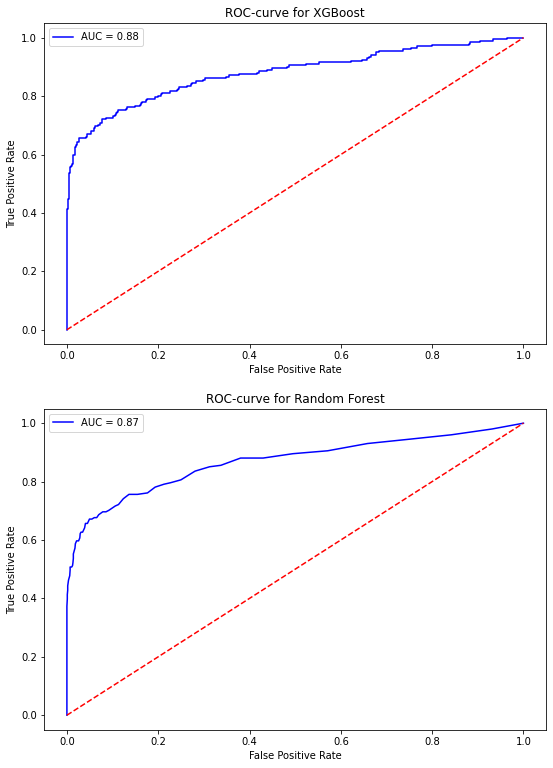

In [38]:
### BEGIN Solution (do not delete this comment)
from time import perf_counter
from sklearn.metrics import average_precision_score, roc_curve, auc

rand_state = 0
clfs = [XGBClassifier(max_depth=5, learning_rate=0.05, n_estimators=100, random_state = rand_state, \
                      n_jobs=-1, verbosity=0),
    RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=25, random_state = rand_state, n_jobs=-1)]

time = []
scores = []
rates = []
roc_auc = []

for clf in clfs:
    start_time = perf_counter()
    clf.fit(X_train, y_train)
    end_time = perf_counter()
    time.append(end_time - start_time)
    y_pred = clf.predict_proba(X_test)[:, 1]
    scores.append(average_precision_score(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    rates.append([fpr, tpr])
    roc_auc.append(auc(fpr, tpr))
                            

print('Training time for xgb: {0}'.format(time[0]))
print('Training time for random forest: {0}'.format(time[1]))
print('Average precision score for XGBoost: {0}'.format(scores[0]))
print('Average precision score for Random Forest: {0}'.format(scores[1]))


fig, axes = plt.subplots(2, 1, figsize = (9, 13))
axes[0].plot(rates[0][0], rates[0][1], 'b', label = 'AUC = %0.2f' % roc_auc[0])
axes[0].legend()
axes[0].plot([0, 1], [0, 1],'r--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC-curve for XGBoost')

axes[1].plot(rates[1][0], rates[1][1], 'b', label = 'AUC = %0.2f' % roc_auc[1])
axes[1].plot([0, 1], [0, 1],'r--')
axes[1].legend()
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC-curve for Random Forest')
fig.show()
### END Solution (do not delete this comment)

* extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers. Are they different or the same, why?

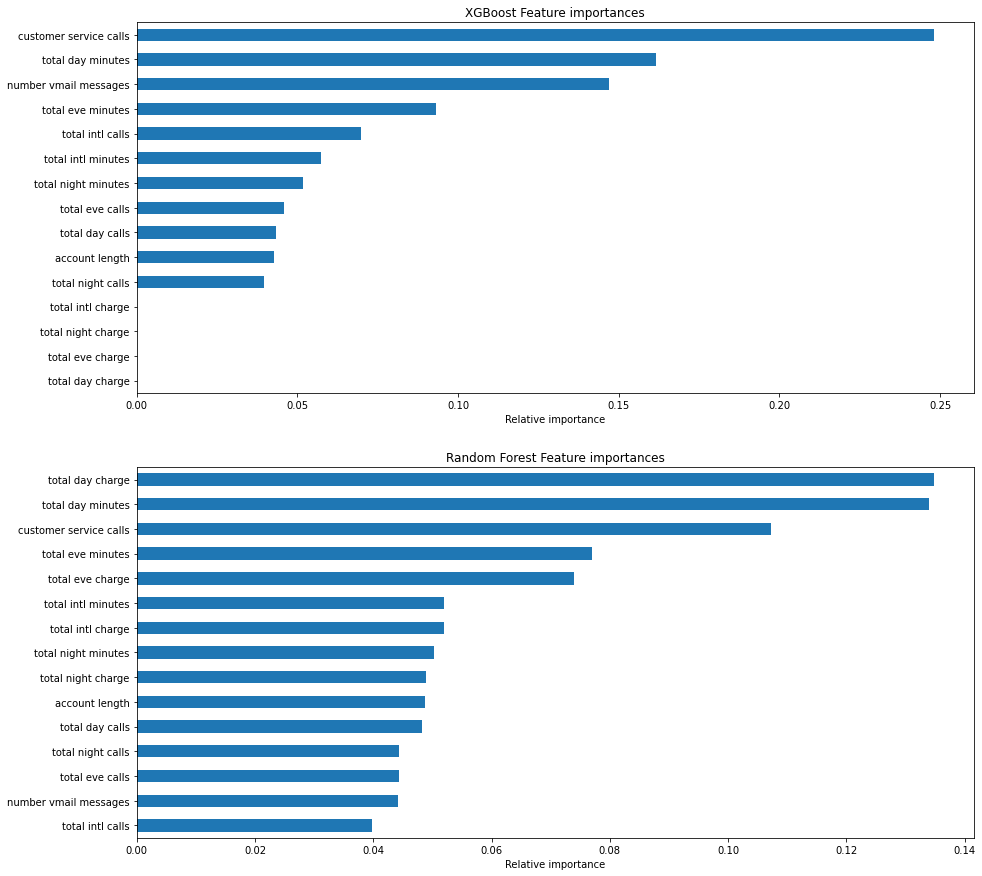

In [39]:
### BEGIN Solution (do not delete this comment)

#feature_important = clfs[0].get_booster().get_score(importance_type='weight')
importances = clfs[0].feature_importances_
keys = data.columns[:-1]
values = np.argsort(importances)
data_xgb = pd.DataFrame(data=importances[values], index=keys[values], columns=['score']).sort_values(by = "score", ascending=True)

#data_xgb = pd.DataFrame(data=values, index=keys, columns=['score']).sort_values(by = "score", ascending=True)

keys = data.columns[:-1]
importances = clfs[1].feature_importances_
values = np.argsort(importances)
data_rf = pd.DataFrame(data=importances[values], index=keys[values], columns=['score']).sort_values(by = "score", ascending=True)


fig, axes = plt.subplots(2, 1, figsize = (15, 15))
data_xgb.plot(kind='barh', ax = axes[0], legend=None)
axes[0].set_xlabel('Relative importance')
axes[0].set_title('XGBoost Feature importances')

data_rf.plot(kind='barh', ax = axes[1], legend=None)
axes[1].set_xlabel('Relative importance')
axes[1].set_title('Random Forest Feature importances')
fig.show()

### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

Feature importances for these two classifiers are significantly different. But the main difference I think is that XGBoost cuts some features if they are correlated and uses only subset of them, according to plot. On the same time,  Random Forest gives weights to all features (maybe because each tree uses only random subset of features so each feature is used somewhere and different correlations between different features are learnt). It may also be the specific of their loss functions chosen by us.

If some features are highly correlated, perhaps, XGBoost would take only one of them whereas Random Forest distributes weights between them. That's maybe why they consider different features as the most important.

### Subproblem 9.2 (1 point)

* For each model separately (XGBoost classifier and Random Forest classifier) perform the following steps:
    1. define the subset of features (in the beginning the subset contains all features)
    2. fit the model using the subset of features
    3. remove the least important feature from the subset (use the importances received in subproblem 9.1)
    4. repeat steps 2 and 3 until no features are left in the subset
    5. make a plot showing how the average precision changes depending on the size of the subset of the most important features


**HINT**: you can use ```sklearn.feature_selection.SelectFromModel``` and its ```.transform``` methods to get the new $X$,$y$ subsets

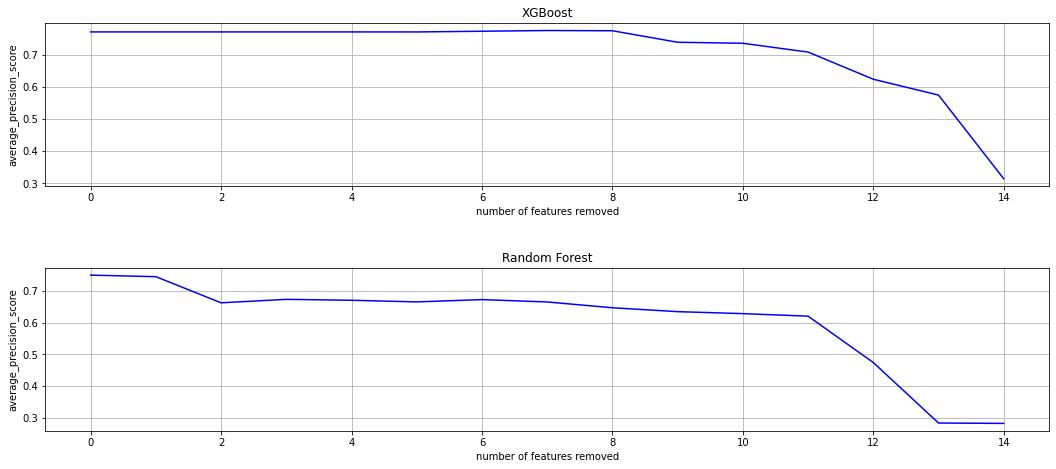

In [40]:
### BEGIN Solution (do not delete this comment)
from sklearn.feature_selection import SelectFromModel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0x0BADBEEF)
max_features = X_train.shape[1]
num_features_xgb = [0]
num_features_rf = [0]
scores_xgb = [scores[0]]
scores_rf = [scores[1]]

len_xgb = len(clfs[0].feature_importances_) - np.count_nonzero(clfs[0].feature_importances_)
features_xgb = sorted(clfs[0].feature_importances_)[len_xgb:]
len_rf = len(clfs[1].feature_importances_) - np.count_nonzero(clfs[1].feature_importances_)
features_rf = sorted(clfs[1].feature_importances_)[len_rf:]

# XGBoost
for feat in features_xgb:
    selector = SelectFromModel(estimator=clfs[0], threshold = feat).fit(X_train, y_train)
    #print(X_subset.shape[1])
    X_1 = selector.transform(X_train)
    num_features_xgb.append(max_features - X_1.shape[1])
    xgb = XGBClassifier(max_depth=5, learning_rate=0.05, n_estimators=100, random_state = rand_state, n_jobs=-1)
    xgb.fit(X_1, y_train)
    y_pred = xgb.predict_proba(selector.transform(X_test))[:, 1]
    scores_xgb.append(average_precision_score(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0x0BADBEEF) 
# Random Forest
for feat in features_rf:
    selector = SelectFromModel(estimator=clfs[1], threshold = feat).fit(X_train, y_train)
    #X_subset = selector.transform(X)
    #print(X_subset.shape[1])
    #X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.4, random_state=0x0BADBEEF)
    X_1 = selector.transform(X_train)
    num_features_rf.append(max_features - X_1.shape[1])
    rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=25, random_state = rand_state, n_jobs=-1)
    rf.fit(X_1, y_train)
    y_pred = rf.predict_proba(selector.transform(X_test))[:, 1]
    scores_rf.append(average_precision_score(y_test, y_pred))


fig, axes = plt.subplots(2, 1, figsize = (18, 7.5))
axes[0].plot(num_features_xgb, scores_xgb, 'b')
axes[0].set_xlabel('number of features removed')
axes[0].set_ylabel('average_precision_score')
axes[0].grid()
axes[0].set_title('XGBoost')

axes[1].plot(num_features_rf, scores_rf, 'b')
axes[1].set_xlabel('number of features removed')
axes[1].set_ylabel('average_precision_score')
axes[1].grid()
axes[1].set_title('Random Forest')

plt.subplots_adjust(wspace=0, hspace=0.5)
fig.show()
### END Solution (do not delete this comment)

# Task 10. Stacking (2 point)

Stacking is another approach to combine several algorithms to get better results. Basically stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The main concept is to learn base models on some set of features then train meta-model, which uses the predictions of base models as features. This technique is widely used in multiple real case scenarios to get better results. One of the main problems of stacking is, of course, overfitting. To avoid it, the training set is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models, and $ n $ -th for the overall prediction (calculating the meta-factor). In order to train the meta-model, it should receive predictions from the base models for those objects of the training sample on which the meta-model will be trained. 

There are various of stacking approaches$.^{[1]}$ For example, in order, to obtain meta-factors for test data, the base classifiers can be trained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers. If we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained$.^{[2]}$ You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.s. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer [source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  
[2] MLgroup SHAD

**The task:**

* Choose 6 different base models(base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml,features e.t.c) and train them.
* Report individual scores on test set for each of the models. As a score use accuracy.
* Complete the ```meta_classfier``` function
* Train meta-classifier on original datasets features, report score on the test.
* Train meta-classifier on those base models. Report the test score (accuracy) in this case.
* Does stacking helped to gain a better score?

Enough of theory, let's get back to Practice. Download dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype) and  split it train-test - 60/40.
More detail about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

**Note**: To save your time, use only part of the dataset to debug your solution.

In [41]:
import sklearn
fc = sklearn.datasets.fetch_covtype()

X_train, X_test, y_train, y_test = train_test_split(fc['data'], fc['target'], test_size=0.4, random_state=0x0BADBEEF)

In [42]:
#np.unique(y_train, return_counts=True)

### Subproblem 10.1. Base models (1 point)

Chose 6 different base models (base models can be any models that you know, and can differ with each other by different hyperparameters,  models of ml, features e.t.c) and train them. 

In [44]:
### BEGIN Solution (do not delete this comment)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit, KFold, cross_val_predict

rand_state = 0

models = [
    RandomForestClassifier(n_estimators=60, max_depth=15, random_state=rand_state, n_jobs=-1),
    RandomForestClassifier(n_estimators=150, max_depth=6, random_state=rand_state, n_jobs=-1),
    XGBClassifier(max_depth=5, learning_rate=0.05, n_estimators=100, random_state = rand_state, n_jobs=-1, verbosity=0),
    SGDClassifier(loss='log', alpha=1e-3, n_jobs=-1, random_state=rand_state),
    LogisticRegression(multi_class='multinomial', tol=1e-5, C=5, random_state=rand_state, n_jobs=-1),
    KNeighborsClassifier(n_neighbors=4, n_jobs=-1)]
    #DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=4, random_state = rand_state)]
    #SVC(C=5, kernel='rbf', degree=4, gamma='auto')]

labels = ['Random Forest 1', 'Random Forest 2', 'XGB', 
          'SGD', 'LogisticRegression', 'KNearestNeighbors']
scores_models = []

for i, clf in zip(range(len(models)), models):
    pca = PCA(n_components=7, svd_solver='full')
    pca.fit(X_train)
    train = pca.transform(X_train)
    test = pca.transform(X_test)
        
    clf.fit(train, y_train)
    y_pred = clf.predict(test)
    scores_models.append(accuracy_score(y_pred, y_test))
    
print('Model\t', 'Accuracy on test set\t')
for label, score in zip(labels, scores_models):
    print(label, '\t', round(score, 3))
    
### END Solution (do not delete this comment)

Model	 Accuracy on test set	
Random Forest 1 	 0.857
Random Forest 2 	 0.697
XGB 	 0.742
SGD 	 0.622
LogisticRegression 	 0.514
KNearestNeighbors 	 0.959


Report individual scores on the test set. As a score use accuracy.

### Subproblem 10.2. Meta classifier (1 point)

Write meta-classifier function.

In [45]:
def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param y_train: numpy array or pandas table, target for train set.
    :param X_test: numpy array or pandas table, test set.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_classifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    ### BEGIN Solution (do not delete this comment)
    rs = ShuffleSplit(n_splits=cv, random_state=rand_state)
    pca = PCA(n_components=7, svd_solver='full')
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    meta_train = np.zeros((X_train.shape[0], len(base_clfs)))
    
    for train_index, test_index in rs.split(X_train):
        train, train_labels = X_train[train_index], y_train[train_index]
        test, test_labels = X_train[test_index], y_train[test_index]
        for i, clf in zip(range(len(base_clfs)), base_clfs):
            clf.fit(train, train_labels)
            meta_train[test_index, i] = clf.predict(test)
            
    meta_train = np.concatenate((X_train, meta_train), axis=1)
    
    meta_test = np.zeros((X_test.shape[0], len(base_clfs)))
    for i, clf in zip(range(len(base_clfs)), base_clfs):
        meta_test[:, i] = clf.predict(X_test)
    meta_test = np.concatenate((X_test, meta_test), axis=1)
    
    final_classifier.fit(meta_train, y_train)
    
    y_pred = final_classifier.predict(meta_test)
    return y_pred, final_classifier
    ### END Solution (do not delete this comment)


Train meta-classifier on original datasets features. And report score on the test.

In [46]:
### BEGIN Solution (do not delete this comment)
meta_clf = LogisticRegression(multi_class='multinomial', tol=1e-5, C=5, \
                              random_state=rand_state, n_jobs=-1)
meta_clf.fit(X_train, y_train)
y_pred = meta_clf.predict(X_test)
score_meta = accuracy_score(y_pred, y_test)
print('meta_classifier accuracy on test set:', score_meta)
print(meta_clf)
### END Solution (do not delete this comment)

meta_classifier accuracy on test set: 0.6189152556958757
LogisticRegression(C=5, multi_class='multinomial', n_jobs=-1, random_state=0,
                   tol=1e-05)


Train meta-classifier on those base models. Report the test score (accuracy) in this case.

In [48]:
### BEGIN Solution (do not delete this comment)
meta_clf = LogisticRegression(multi_class='multinomial', tol=1e-5, C=10, random_state=rand_state, n_jobs=-1)
models = [
    RandomForestClassifier(n_estimators=60, max_depth=15, random_state=rand_state, n_jobs=-1),
    RandomForestClassifier(n_estimators=150, max_depth=6, random_state=rand_state, n_jobs=-1),
    XGBClassifier(max_depth=5, learning_rate=0.05, n_estimators=100, random_state = rand_state, n_jobs=-1, verbosity=0),
    SGDClassifier(loss='log', alpha=1e-3, n_jobs=-1, random_state=rand_state),
    LogisticRegression(multi_class='multinomial', tol=1e-5, C=5, random_state=rand_state, n_jobs=-1),
    KNeighborsClassifier(n_neighbors=4, n_jobs=-1)]

y_pred, final_clf = meta_classifier(models, meta_clf, X_train, X_test, y_train, cv = 5)
score_meta_2 = accuracy_score(y_pred, y_test)
print('meta_classifier accuracy on test set:', score_meta_2)
print(final_clf)

### END Solution (do not delete this comment)

0.5628923646221037
LogisticRegression(C=10, multi_class='multinomial', n_jobs=-1, random_state=0,
                   tol=1e-05)


Does stacking helped to gain better score?

**Your text answer (do not delete this comment)**:

For some reasons stacking didn't help me get better score. I think it would if I chose another final classifier or only left some of meta features. The problem is also that it takes quite a long time to work so in my case the efforts didn't worth it.

It may be due to the overfitting because meta features are very correlated so one may try different final classifier in order it to cope with this problem. If one would have enough resourses he could also try to make more powerful set of base classifiers.

What my experiment proves is that in order to achieve success one should wisely apply stacking.